# What Drives Supplement Sales? A Predictive Modeling Approach

##Introduction and Preparation of Data Set


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/khine30/khine_final_project/refs/heads/main/Supplement_Sales_Weekly_Expanded.csv')
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [5]:
df.describe(include='all'), df.columns


(              Date  Product Name Category   Units Sold        Price  \
 count         4384          4384     4384  4384.000000  4384.000000   
 unique         274            16       10          NaN          NaN   
 top     2025-03-31  Whey Protein  Vitamin          NaN          NaN   
 freq            16           274      822          NaN          NaN   
 mean           NaN           NaN      NaN   150.200274    34.781229   
 std            NaN           NaN      NaN    12.396099    14.198309   
 min            NaN           NaN      NaN   103.000000    10.000000   
 25%            NaN           NaN      NaN   142.000000    22.597500   
 50%            NaN           NaN      NaN   150.000000    34.720000   
 75%            NaN           NaN      NaN   158.000000    46.712500   
 max            NaN           NaN      NaN   194.000000    59.970000   
 
              Revenue     Discount  Units Returned Location Platform  
 count    4384.000000  4384.000000     4384.000000     4384    

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.year

In [7]:
df = df[['Product Name', 'Category', 'Discount', 'Price', 'Location', 'Platform',
         'Week', 'Year', 'Units Sold']]


In [8]:
df.columns = df.columns.str.replace(' ', '_')


In [9]:
df.head()

,Product_Name,Category,Discount,Price,Location,Platform,Week,Year,Units_Sold
0,Whey Protein,Protein,0.03,31.98,Canada,Walmart,2,2020,143
1,Vitamin C,Vitamin,0.04,42.51,UK,Amazon,2,2020,139
2,Fish Oil,Omega,0.25,12.91,Canada,Amazon,2,2020,161
3,Multivitamin,Vitamin,0.08,16.07,Canada,Walmart,2,2020,140
4,Pre-Workout,Performance,0.25,35.47,Canada,iHerb,2,2020,157


##Initial Exploratory Data Analysis

Text(0.5, 1.0, 'Units Sold by Platform')

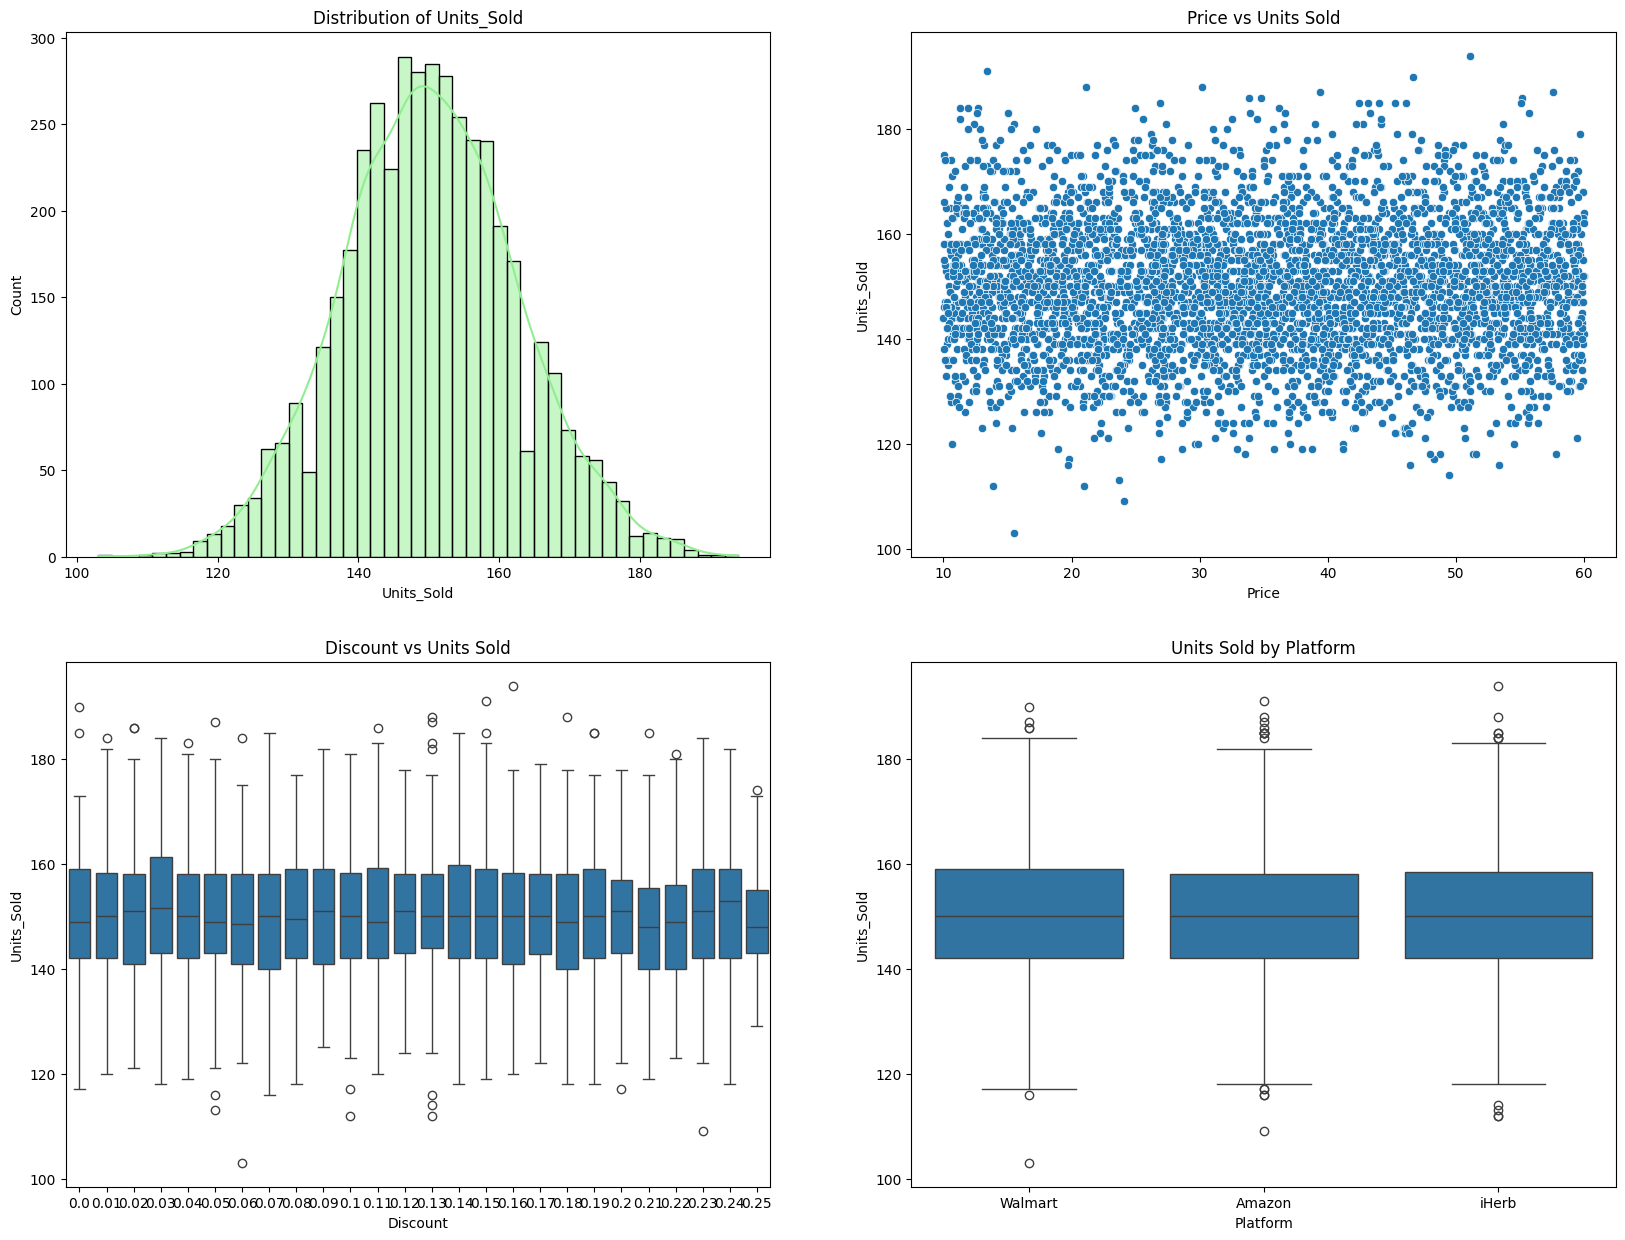

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Histogram of Units Sold
sns.histplot(df['Units_Sold'], kde=True, ax=axes[0, 0], color='lightgreen')
axes[0, 0].set_title('Distribution of Units_Sold')

# Price vs Units Sold
sns.scatterplot(data=df, x='Price', y='Units_Sold', ax=axes[0, 1])
axes[0, 1].set_title('Price vs Units Sold')

# Discount vs Units Sold
sns.boxplot(data=df, x='Discount', y='Units_Sold', ax=axes[1, 0])
axes[1, 0].set_title('Discount vs Units Sold')

# Platform vs Units Sold
sns.boxplot(data=df, x='Platform', y='Units_Sold', ax=axes[1, 1])
axes[1, 1].set_title('Units Sold by Platform')


In [11]:
#Top-Selling Products and Categories
avg_units_by_product = df.groupby('Product_Name')['Units_Sold'].mean()
avg_units_by_category = df.groupby('Category')['Units_Sold'].mean()

avg_units_product_df = avg_units_by_product.reset_index().rename(columns={'Units_Sold': 'Avg Units Sold'})
avg_units_category_df = avg_units_by_category.reset_index().rename(columns={'Units_Sold': 'Avg Units Sold'})
top_products = avg_units_product_df.sort_values(by='Avg Units Sold', ascending=False).head(3)
top_categories = avg_units_category_df.sort_values(by='Avg Units Sold', ascending=False).head(3)
print("Top 3 Selling Products:")
print(top_products)
print("\nTop 3 Selling Categories:")
print(top_categories)

Top 3 Selling Products:
  Product_Name  Avg Units Sold
2       Biotin      151.580292
0  Ashwagandha      151.124088
6     Fish Oil      150.821168

Top 3 Selling Categories:
      Category  Avg Units Sold
2       Herbal      151.124088
5        Omega      150.821168
6  Performance      150.589416


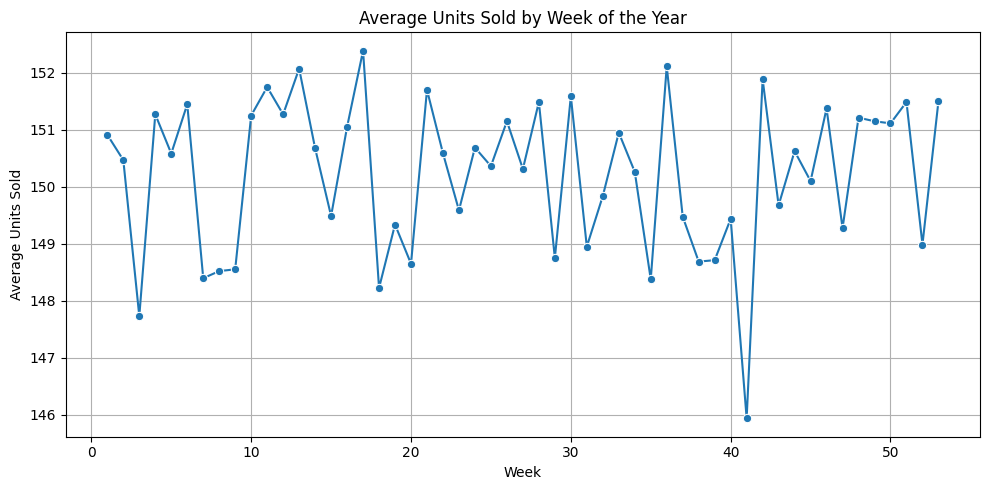

In [12]:
#Weekly and Yearly Sales Trends
weekly_sales = df.groupby('Week')['Units_Sold'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, marker='o')
plt.title('Average Units Sold by Week of the Year')
plt.xlabel('Week')
plt.ylabel('Average Units Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
#Sales Distribution by Product
yearly_sales = df.groupby('Year')['Units_Sold'].mean()
yearly_sales_df = yearly_sales.reset_index().rename(columns={'Units Sold': 'Average Units Sold'})
print(yearly_sales_df)

   Year  Units_Sold
0  2020  149.828125
1  2021  149.881010
2  2022  150.441106
3  2023  150.286058
4  2024  150.597877
5  2025  150.038462


<ipython-input-14-a47ea97e1c24>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, x='Product_Name', y='Units_Sold', palette='Set2') # Changed 'product_Name' to 'Product_Name' and 'units_sold' to 'Units_Sold'


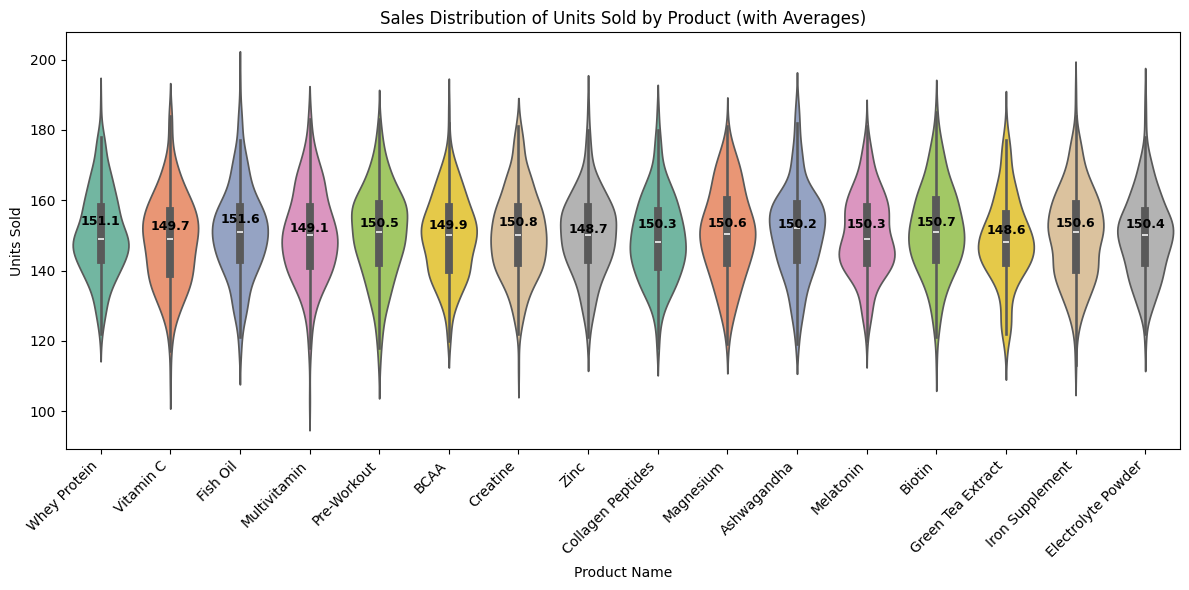

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=df, x='Product_Name', y='Units_Sold', palette='Set2') # Changed 'product_Name' to 'Product_Name' and 'units_sold' to 'Units_Sold'

# Annotate with average units sold above each violin
averages = df.groupby('Product_Name')['Units_Sold'].mean() # Changed 'product_Name' to 'Product_Name' and 'units_Sold' to 'Units_Sold'
for i, avg in enumerate(averages):
    ax.text(i, avg + 1, f'{avg:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

plt.title('Sales Distribution of Units Sold by Product (with Averages)')
plt.xlabel('Product Name')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Modeling & Interpretations

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

In [15]:
# Redefine features and target for modeling
X = df[['Product_Name', 'Category', 'Discount', 'Price', 'Location', 'Platform', 'Week', 'Year']]
y = df['Units_Sold']

In [16]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline Model



In [17]:
y = df['Units_Sold']
baseline_preds = np.ones(len(y_test)) * y_train.mean()
mean_squared_error(y_test, baseline_preds)

159.69413628421012

###Multiple Regression Model




In [18]:
categorical_cols = ['Product_Name', 'Category', 'Location', 'Platform']
numerical_cols = ['Discount', 'Price', 'Week', 'Year']

In [19]:
# Preprocessor: One-hot encode categorical, scale numerical
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
    (StandardScaler(), numerical_cols)
)

In [20]:
# Pipeline
multi_regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [21]:
multi_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Product_Name', 'Category',
                                                   'Location', 'Platform']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Discount', 'Price', 'Week',
                                                   'Year'])])),
                ('model', LinearRegression())])

In [22]:
y_train_preds = multi_regression_pipeline.predict(X_train)
y_test_preds = multi_regression_pipeline.predict(X_test)

In [23]:
train_mse = mean_squared_error(y_train, y_train_preds)
test_mse = mean_squared_error(y_test, y_test_preds)

In [24]:
print("Multiple Regression Training MSE:", train_mse)
print("Multiple Regression Testing MSE:", test_mse)

Multiple Regression Training MSE: 150.86091634299538
Multiple Regression Testing MSE: 161.41614233239505


In [25]:
lr = multi_regression_pipeline.named_steps['model']
transformer = multi_regression_pipeline.named_steps['preprocessor']

In [26]:
feature_names = transformer.get_feature_names_out()

In [27]:
coefficients = pd.DataFrame(lr.coef_, index=feature_names, columns=["Coefficient"])
coefficients.sort_values(by="Coefficient", ascending=False).head(10)


,Coefficient
onehotencoder__Product_Name_Biotin,1.598497
onehotencoder__Platform_Walmart,0.957387
onehotencoder__Product_Name_Whey Protein,0.879143
onehotencoder__Product_Name_Magnesium,0.686710
onehotencoder__Platform_iHerb,0.627691
onehotencoder__Location_USA,0.615838
onehotencoder__Category_Omega,0.473823
onehotencoder__Product_Name_Fish Oil,0.473823
onehotencoder__Product_Name_Pre-Workout,0.444882
onehotencoder__Category_Herbal,0.434149


###Decision Tree Regression Model


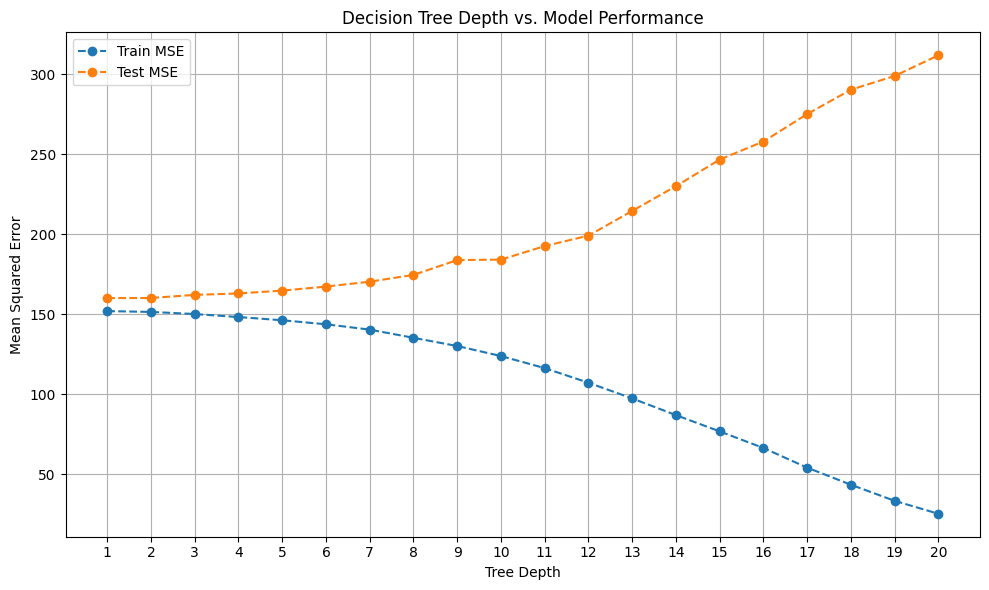

In [28]:
#finding the best depth for Decision tree
depths = list(range(1, 21))
train_mses = []
test_mses = []

for depth in depths:
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(max_depth=depth, random_state=42))
    ])
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_mses.append(mean_squared_error(y_train, train_preds))
    test_mses.append(mean_squared_error(y_test, test_preds))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_mses, '--o', label='Train MSE')
plt.plot(depths, test_mses, '--o', label='Test MSE')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree Depth vs. Model Performance')
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# Preprocessing: One-hot encode categorical, scale numeric
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), ['Product_Name', 'Category', 'Location', 'Platform']),
    (StandardScaler(), ['Discount', 'Price', 'Week', 'Year']))

In [32]:
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=5, random_state=42))])

In [33]:
# Fit model
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Product_Name', 'Category',
                                                   'Location', 'Platform']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Discount', 'Price', 'Week',
                                                   'Year'])])),
                ('model', DecisionTreeRegressor(max_depth=5, random_state=42))])

In [34]:
y_train_preds = tree_pipeline.predict(X_train)
y_test_preds = tree_pipeline.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_preds)
test_mse = mean_squared_error(y_test, y_test_preds)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training MSE: 146.15752553178876
Testing MSE: 164.687666368847


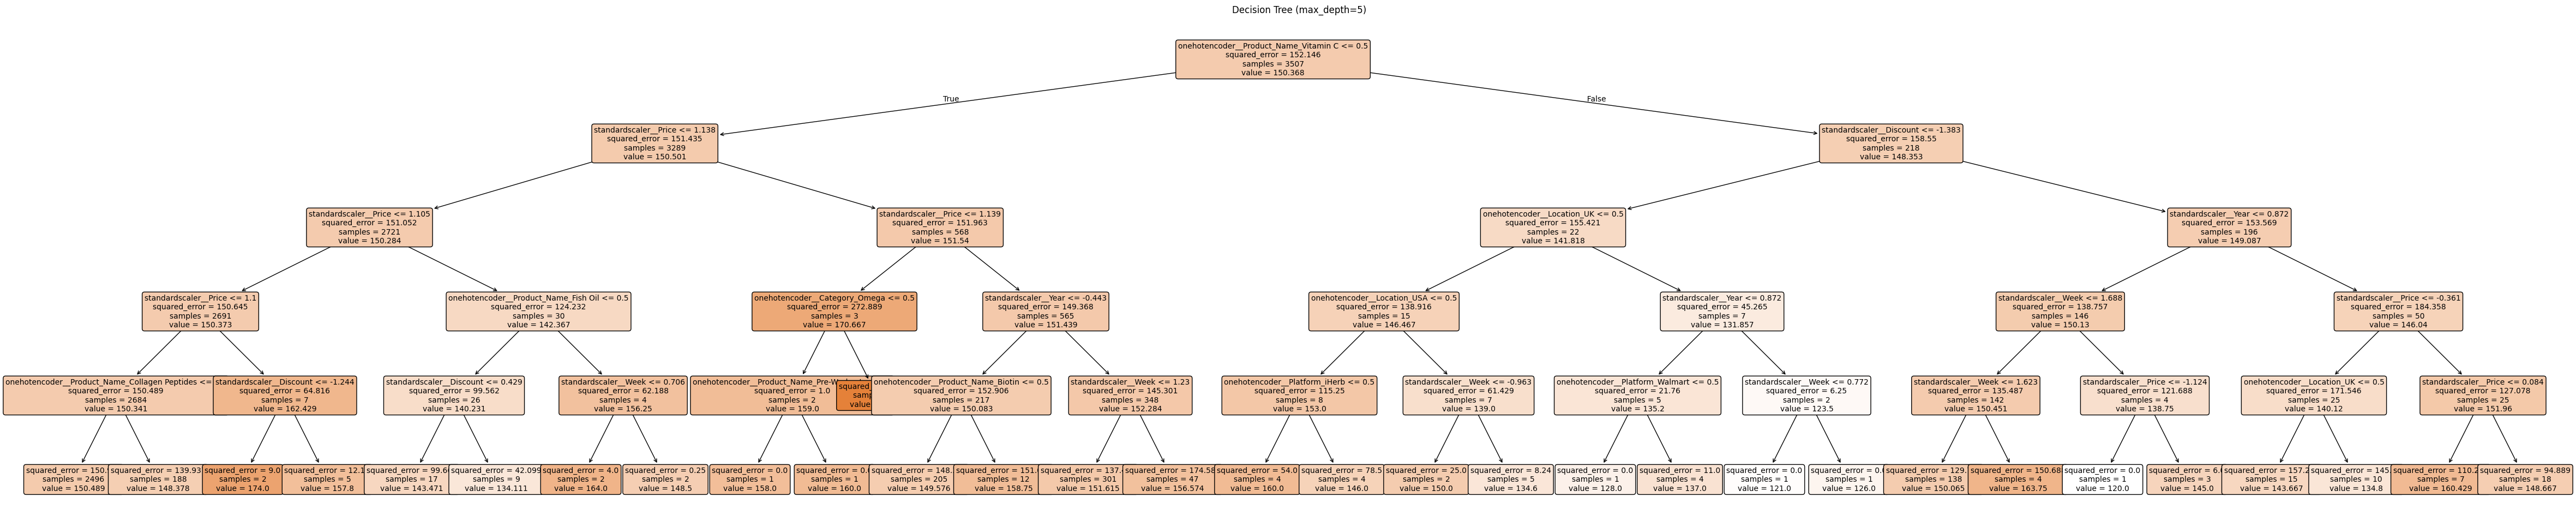

In [35]:
# Visualisation of Decision Tree
fitted_tree = tree_pipeline.named_steps['model']

feature_names = tree_pipeline.named_steps['preprocessor'].get_feature_names_out()
plt.figure(figsize=(60,12))
plot_tree(
    fitted_tree,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=10)
plt.title("Decision Tree (max_depth=5)")
plt.show()


In [36]:
encoder = tree_pipeline.named_steps['preprocessor']
model = tree_pipeline.named_steps['model']

X_test_encoded = encoder.transform(X_test)


In [37]:
# Permutation importance
r = permutation_importance(model, X_test_encoded, y_test, n_repeats=10, random_state=42)

In [54]:
importance = pd.DataFrame({
    0: r.importances_mean
}, index=encoder.get_feature_names_out().tolist())
importance.sort_values(by=0, ascending=False).head(10)

,0
onehotencoder__Product_Name_Vitamin C,0.004625
standardscaler__Price,0.001597
onehotencoder__Product_Name_Biotin,0.000351
onehotencoder__Product_Name_Creatine,0.000000
onehotencoder__Product_Name_Iron Supplement,0.000000
onehotencoder__Product_Name_Green Tea Extract,0.000000
onehotencoder__Product_Name_Magnesium,0.000000
onehotencoder__Product_Name_BCAA,0.000000
onehotencoder__Product_Name_Pre-Workout,0.000000
onehotencoder__Product_Name_Whey Protein,0.000000


###K-Nearest Neighbors Regression Model


In [38]:
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())])


In [39]:
param_grid_knn = {
    'model__n_neighbors': [3, 5, 10, 15, 20]}


In [40]:
# Set up GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid_knn,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1)


In [41]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Product_Name',
                                                                          'Category',
                                                                          'Location',
                                                                          'Platform']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Discount',
                                                                          'Price',
                                                                          'Week',
                                                                          'Year'])])),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1, param_grid={'model__n_neighbors': [3, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [42]:
best_knn_model = grid_search_knn.best_estimator_
best_params_knn = grid_search_knn.best_params_

In [43]:
y_train_best_knn = best_knn_model.predict(X_train)
y_test_best_knn = best_knn_model.predict(X_test)
train_mse_best_knn = mean_squared_error(y_train, y_train_best_knn)
test_mse_best_knn = mean_squared_error(y_test, y_test_best_knn)


In [44]:
X_test_transformed_knn = preprocessor.transform(X_test)
r_best_knn = permutation_importance(best_knn_model.named_steps['model'], X_test_transformed_knn, y_test, n_repeats=10, random_state=42)

importance_df_best_knn = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': r_best_knn.importances_mean
}).sort_values(by='Importance', ascending=False)


In [45]:
train_mse_best_knn, test_mse_best_knn, best_params_knn, importance_df_best_knn.head(10)

(144.9960856857713,
 164.80182440136832,
 {'model__n_neighbors': 20},
                                            Feature  Importance
 28                        standardscaler__Discount    0.012759
 20             onehotencoder__Category_Performance    0.009645
 7      onehotencoder__Product_Name_Iron Supplement    0.007196
 21                 onehotencoder__Category_Protein    0.007105
 3             onehotencoder__Product_Name_Creatine    0.007037
 30                            standardscaler__Week    0.006447
 4   onehotencoder__Product_Name_Electrolyte Powder    0.005831
 17               onehotencoder__Category_Hydration    0.005831
 11         onehotencoder__Product_Name_Pre-Workout    0.005491
 13        onehotencoder__Product_Name_Whey Protein    0.004406)

###Random Forest Regression Model


In [46]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42))
])

In [47]:
# Define parameter grid for GridSearchCV
param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 6, 10]}

In [48]:
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1)


In [49]:
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Product_Name',
                                                                          'Category',
                                                                          'Location',
                                                                          'Platform']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['Discount',
                                                                          'Price',
                                                                          'Week',
                                                                          'Year'])])),
                                       ('model',
                                        RandomForestRegressor(max_depth=6,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5, 6, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [50]:
best_rf_model = grid_search_rf.best_estimator_
best_rf_params = grid_search_rf.best_params_


In [51]:
y_train_best_rf = best_rf_model.predict(X_train)
y_test_best_rf = best_rf_model.predict(X_test)
train_mse_best_rf = mean_squared_error(y_train, y_train_best_rf)
test_mse_best_rf = mean_squared_error(y_test, y_test_best_rf)


In [52]:
X_test_transformed_rf = preprocessor.transform(X_test)
r_best_rf = permutation_importance(best_rf_model.named_steps['model'], X_test_transformed_rf, y_test, n_repeats=10, random_state=42)


In [53]:
importance_df_best_rf = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out(),
    'Importance': r_best_rf.importances_mean
}).sort_values(by='Importance', ascending=False)

train_mse_best_rf, test_mse_best_rf, best_rf_params, importance_df_best_rf.head(10)

(149.08794675274822,
 160.3130527793949,
 {'model__max_depth': 3, 'model__n_estimators': 200},
                                           Feature  Importance
 31                           standardscaler__Year    0.000242
 15             onehotencoder__Category_Fat Burner    0.000170
 6   onehotencoder__Product_Name_Green Tea Extract    0.000156
 11        onehotencoder__Product_Name_Pre-Workout    0.000133
 13       onehotencoder__Product_Name_Whey Protein    0.000131
 25                    onehotencoder__Location_USA    0.000122
 16                 onehotencoder__Category_Herbal    0.000120
 28                       standardscaler__Discount    0.000107
 24                     onehotencoder__Location_UK    0.000098
 7     onehotencoder__Product_Name_Iron Supplement    0.000073)